In [1]:
import os
os.getcwd()

'C:\\Users\\DELL'

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Select 15 features
selected_features = data.feature_names[:15]
X_selected = X[:, :15]

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_selected)

# Convert to DataFrame for better visualization
df = pd.DataFrame(X_normalized, columns=selected_features)
df['target'] = y

print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                

In [26]:
def gram_schmidt(X):
    Q = np.zeros_like(X)
    for i in range(X.shape[1]):
        qi = X[:, i]
        for j in range(i):
            qj = Q[:, j]
            qi -= np.dot(qi, qj) * qj
        qi /= np.linalg.norm(qi)
        Q[:, i] = qi
    return Q

# Apply Gram-Schmidt process
Q = gram_schmidt(X_normalized)

# Convert to DataFrame for visualization
df_orthogonal = pd.DataFrame(Q, columns=selected_features)
df_orthogonal['target'] = y

print(df_orthogonal.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.045991     -0.107606        0.124092  -0.040554        -0.029469   
1     0.076710     -0.041921       -0.085726   0.038102        -0.001384   
2     0.066232     -0.002453       -0.006180   0.000507         0.039794   
3    -0.032234      0.022274        0.110083  -0.015127         0.102255   
4     0.073376     -0.076146        0.027306   0.023494        -0.028366   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.087916        0.012373             0.054903       0.010193   
1          0.055822       -0.014626            -0.007869       0.039252   
2          0.033964        0.024715             0.093113       0.010167   
3          0.187092       -0.001096             0.013777       0.001799   
4         -0.082364        0.028516            -0.017931      -0.001403   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                

In [27]:
def measure_orthogonality(Q):
    orthogonality_matrix = np.dot(Q.T, Q)
    off_diagonal_elements = orthogonality_matrix - np.diag(np.diagonal(orthogonality_matrix))
    orthogonality_score = np.sum(np.abs(off_diagonal_elements))
    return orthogonality_score

# Measure orthogonality
orthogonality_score = measure_orthogonality(Q)
print(f'Orthogonality Score: {orthogonality_score}')


Orthogonality Score: 5.797767051608088e-14


In [28]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(Q, y, test_size=0.1, random_state=42)

# Train a Logistic Regression classifier
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Orthogonalized Features: {accuracy}')


Accuracy with Orthogonalized Features: 0.9298245614035088


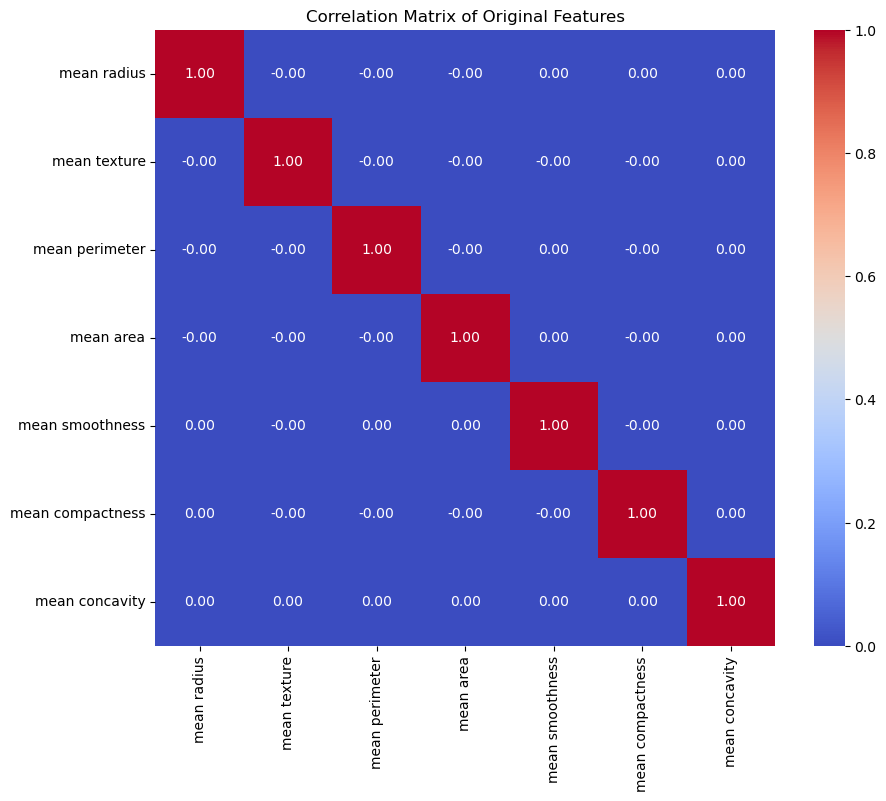

In [43]:
# Plot 1: Correlation Matrix of Original Features
plt.figure(figsize=(10, 8))
sns.heatmap(df[data.feature_names[:7]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Original Features')
plt.show()

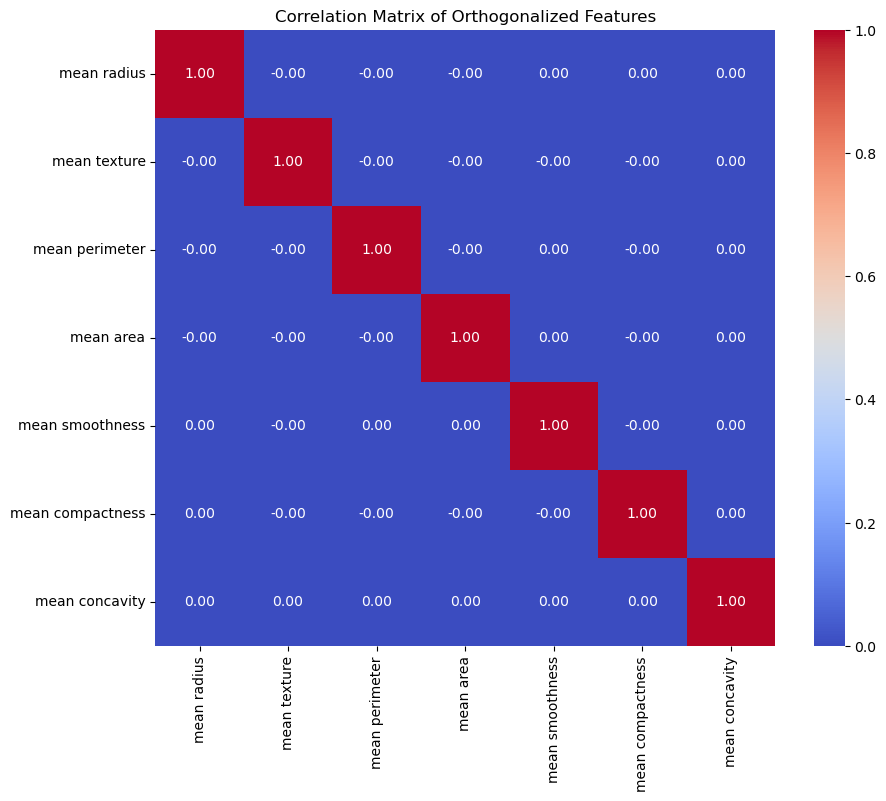

In [39]:
# Plot 2: Correlation Matrix of Orthogonalized Features
plt.figure(figsize=(10, 8))
sns.heatmap(df_orthogonal[data.feature_names[:7]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Orthogonalized Features')
plt.show()

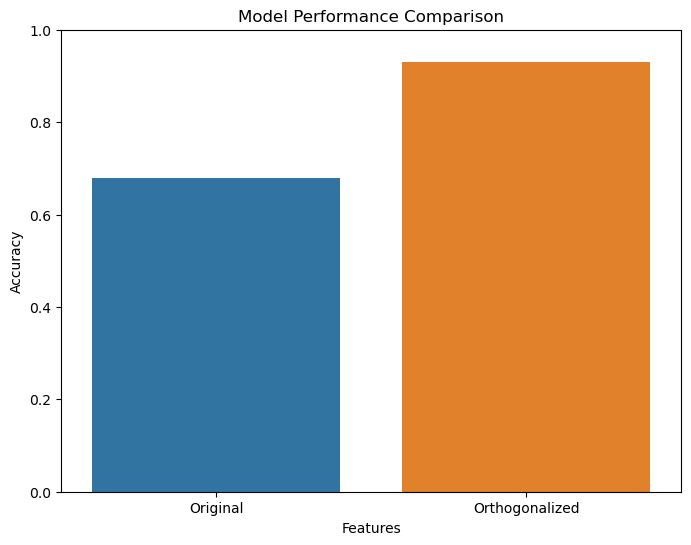

In [32]:
# Plot 3: Model Performance Comparison
# Evaluate the model on original features
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
clf_orig = LogisticRegression(max_iter=10000)
clf_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = clf_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)

# Bar plot comparison
accuracy_data = pd.DataFrame({
    'Features': ['Original', 'Orthogonalized'],
    'Accuracy': [accuracy_orig, accuracy]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Features', y='Accuracy', data=accuracy_data)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float

# Load image and convert to grayscale
def load_image(url):
    image = io.imread(url)
    if image.ndim == 3:
        image = color.rgb2gray(image)
    return img_as_float(image)

# Compute Singular Value Decomposition
def compute_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt

# Reconstruct image using top k singular values
def reconstruct_image(U, S, Vt, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

# Compute the least squares error
def compute_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed)

# Compute explained variance ratio
def explained_variance_ratio(S, k):
    return np.sum(S[:k]**2) / np.sum(S**2)

# Plot the results
def plot_results(original, reconstructed_images, errors, singular_values, explained_variances):
    plt.figure(figsize=(15, 10))

    # Plot the original image
    plt.subplot(3, len(singular_values) + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot the reconstructed images, errors, and explained variance ratios
    for i, k in enumerate(singular_values):
        # Reconstructed image
        plt.subplot(3, len(singular_values) + 1, i + 2)
        plt.imshow(reconstructed_images[i], cmap='gray')
        plt.title(f'k = {k}')
        plt.axis('off')

        # Error plot
        plt.subplot(3, len(singular_values) + 1, len(singular_values) + i + 3)
        plt.plot(reconstructed_images[i].flatten() - original.flatten())
        plt.title(f'Error (k = {k})')
        plt.xlabel('Pixel Index')
        plt.ylabel('Error')

        # Explained variance ratio
        plt.subplot(3, len(singular_values) + 1, 2 * len(singular_values) + i + 4)
        plt.bar([k], [explained_variances[i]])
        plt.ylim(0, 1)
        plt.title(f'Explained Variance (k = {k})')
        plt.xlabel('k')
        plt.ylabel('Variance Ratio')

    plt.tight_layout()
    plt.show()

def main():
    # Load the image
    url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Example.jpg/800px-Example.jpg'
    image = load_image(url)

    # Compute SVD
    U, S, Vt = compute_svd(image)

       

In [13]:
main()

In [3]:
# Singular values to test
singular_values = [5, 20, 50, 100, 200, 300, 400, 500]

reconstructed_images = []
errors = []
explained_variances = []

In [17]:
def plot_final(k,url):
    
        image = load_image(url)

        # Compute SVD
        U, S, Vt = compute_svd(image)
        # Reconstruct image using top k singular values
        reconstructed = reconstruct_image(U, S, Vt, k)
        reconstructed_images.append(reconstructed)

        # Compute error
        error = compute_error(image, reconstructed)
        errors.append(error)

        # Compute explained variance ratio
        explained_variance = explained_variance_ratio(S, k)
        explained_variances.append(explained_variance)

        # Plot the results
        plot_results(image, reconstructed_images, errors, singular_values, explained_variances)

IndexError: list index out of range

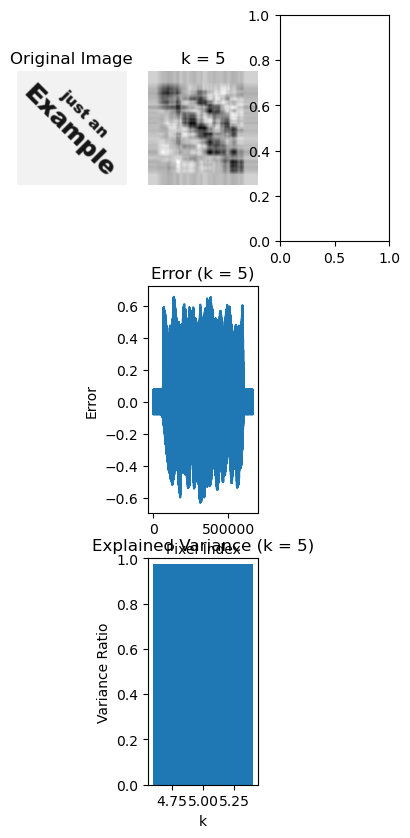

In [18]:
plot_final(5,'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Example.jpg/800px-Example.jpg')

In [19]:
! pip install numpy matplotlib scikit-image

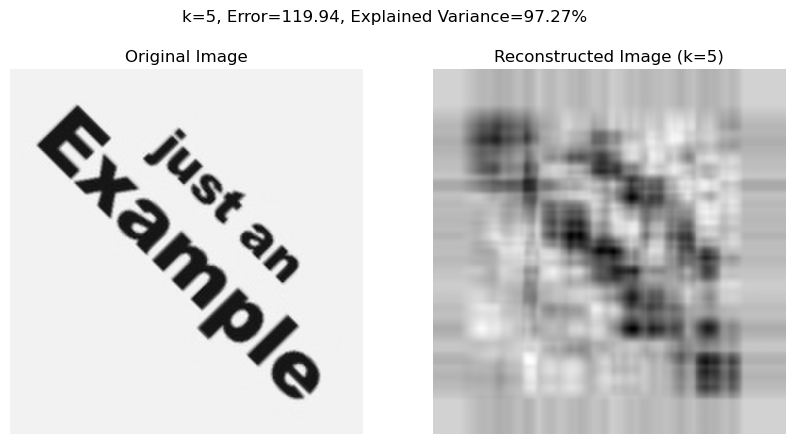

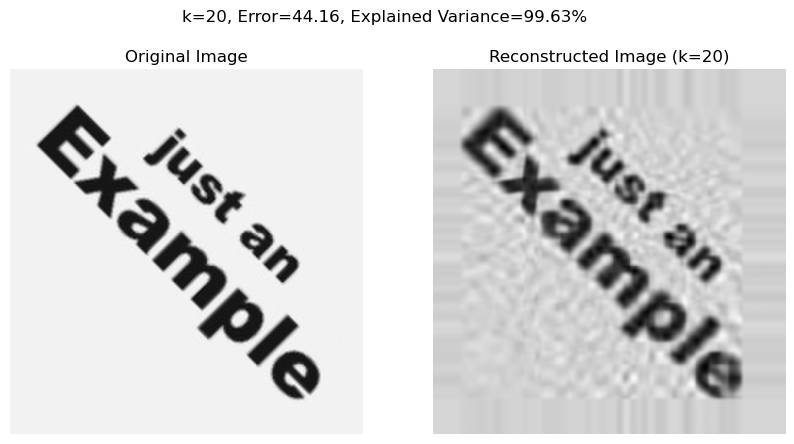

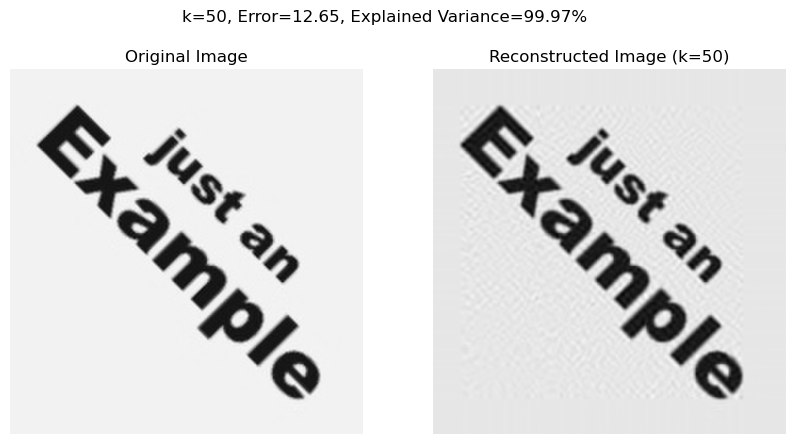

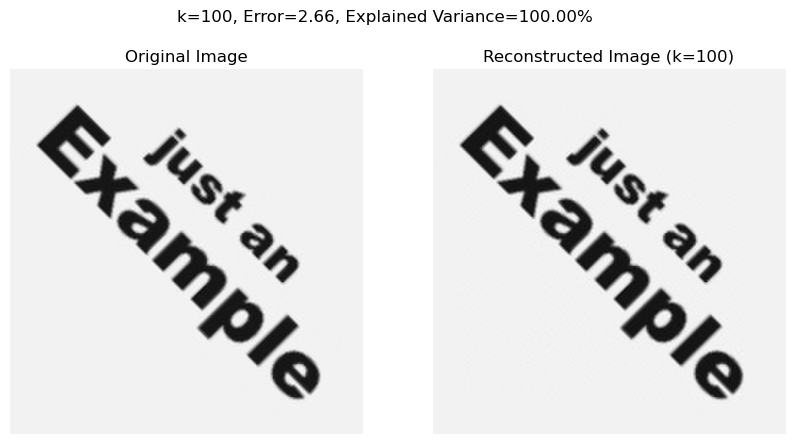

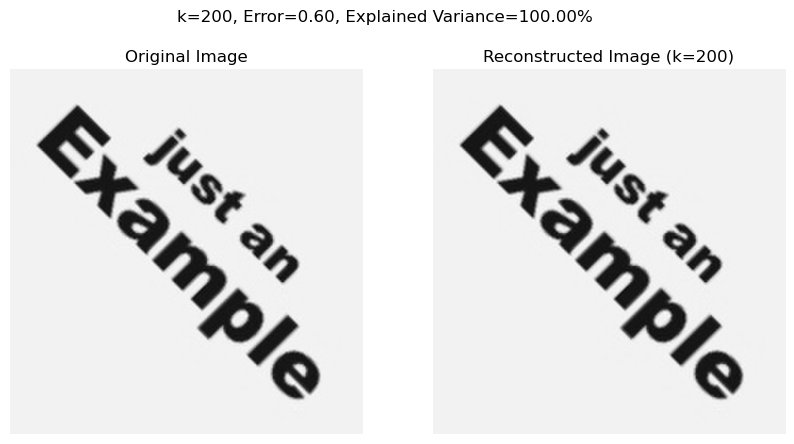

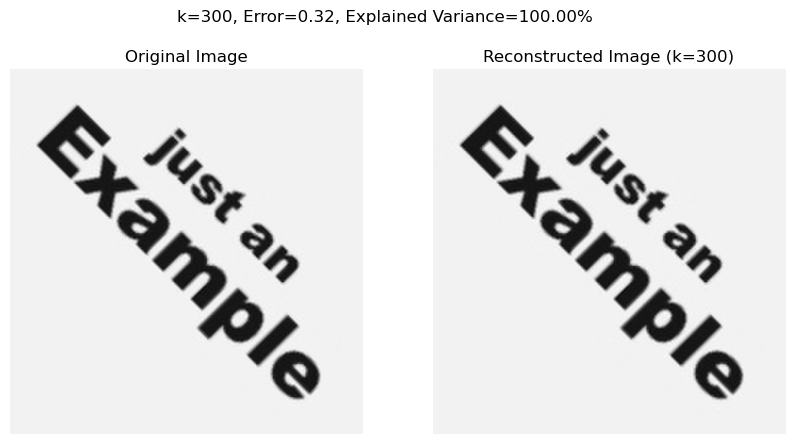

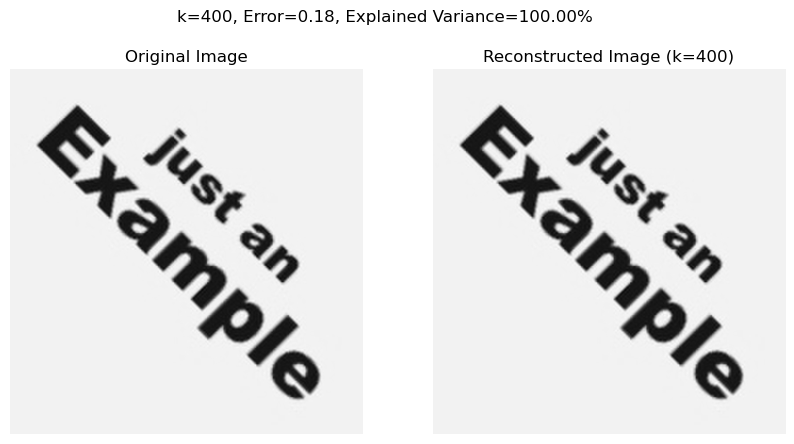

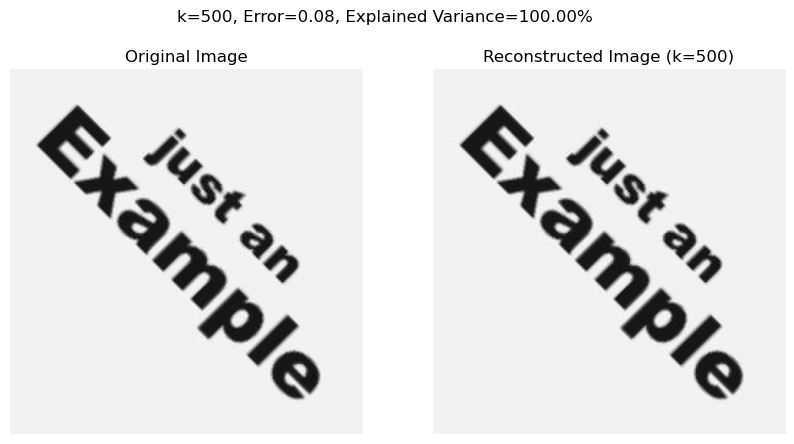

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float

# Load image and convert to grayscale
def load_image(url):
    image = io.imread(url)
    if image.ndim == 3:
        image = color.rgb2gray(image)
    return img_as_float(image)

# Compute Singular Value Decomposition
def compute_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt

# Reconstruct image using top k singular values
def reconstruct_image(U, S, Vt, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

# Compute the least squares error
def compute_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed)

# Compute explained variance ratio
def explained_variance_ratio(S, k):
    return np.sum(S[:k]**2) / np.sum(S**2)

# Display the original and reconstructed images with metrics
def display_results(original, reconstructed, k, error, explained_variance):
    plt.figure(figsize=(10, 5))
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Display reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f'Reconstructed Image (k={k})')
    plt.axis('off')

    plt.suptitle(f'k={k}, Error={error:.2f}, Explained Variance={explained_variance:.2%}')
    plt.show()

def main():
    # Load the image
    url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Example.jpg/800px-Example.jpg'
    image = load_image(url)

    # Compute SVD
    U, S, Vt = compute_svd(image)

    # Singular values to test
    singular_values = [5, 20, 50, 100, 200, 300, 400, 500]

    for k in singular_values:
        # Reconstruct image using top k singular values
        reconstructed = reconstruct_image(U, S, Vt, k)
        
        # Compute error
        error = compute_error(image, reconstructed)
        
        # Compute explained variance ratio
        explained_variance = explained_variance_ratio(S, k)
        
        # Display results
        display_results(image, reconstructed, k, error, explained_variance)

if __name__ == "__main__":
    main()


In [21]:
! pip install imageio

In [ ]:
MFDS_ASSIGNMENT_PY/

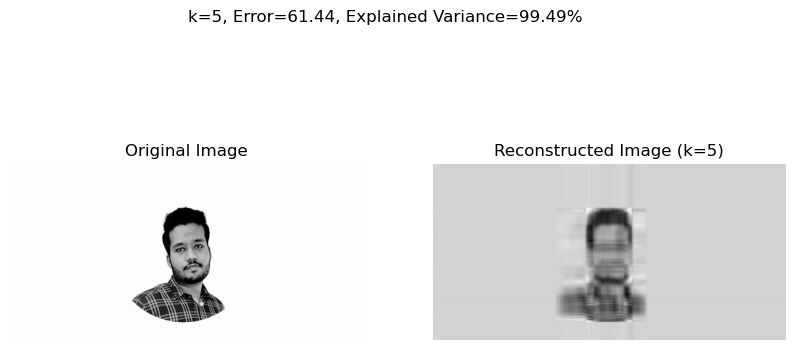

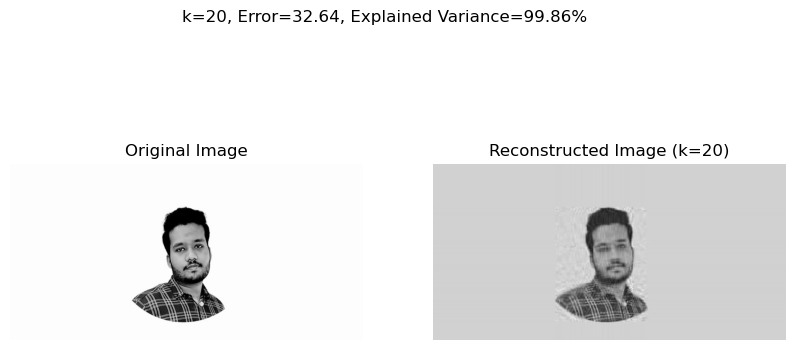

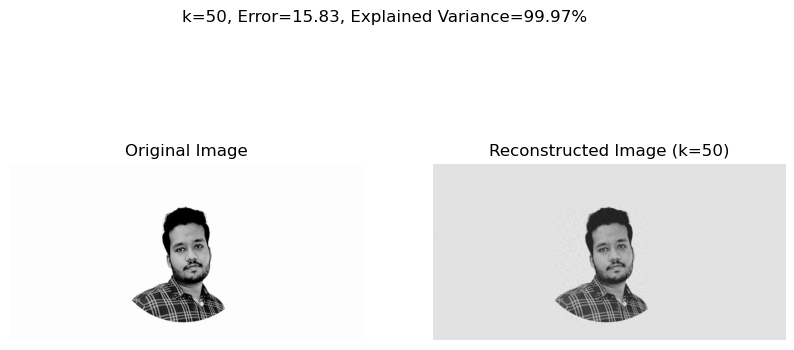

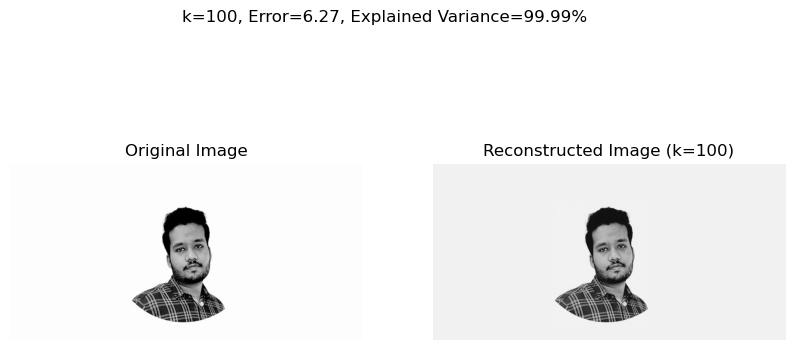

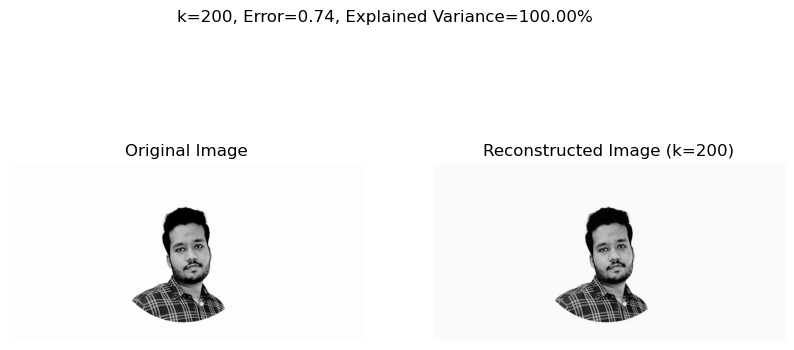

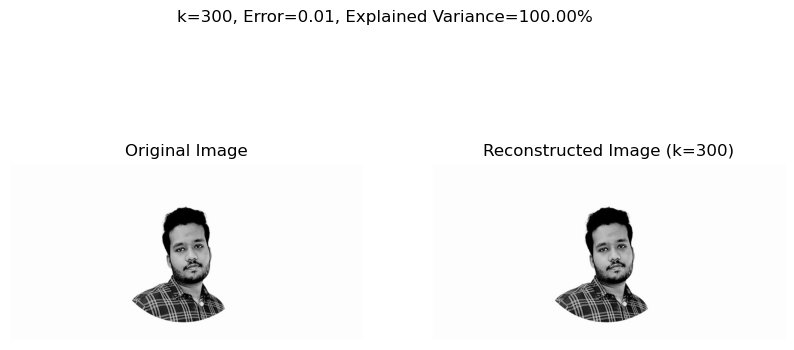

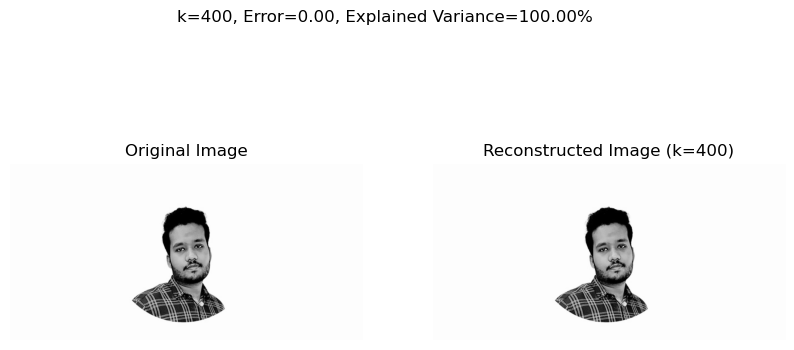

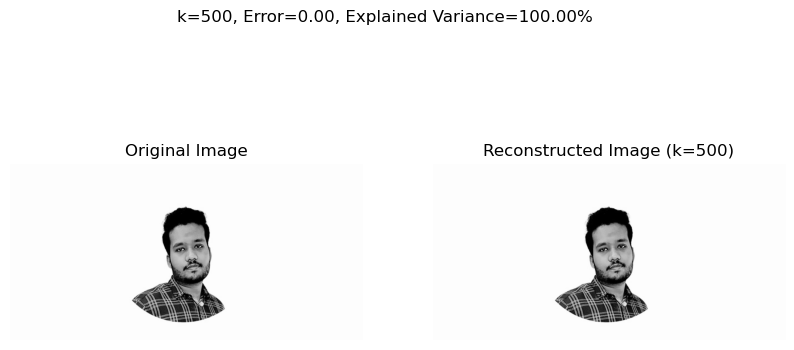

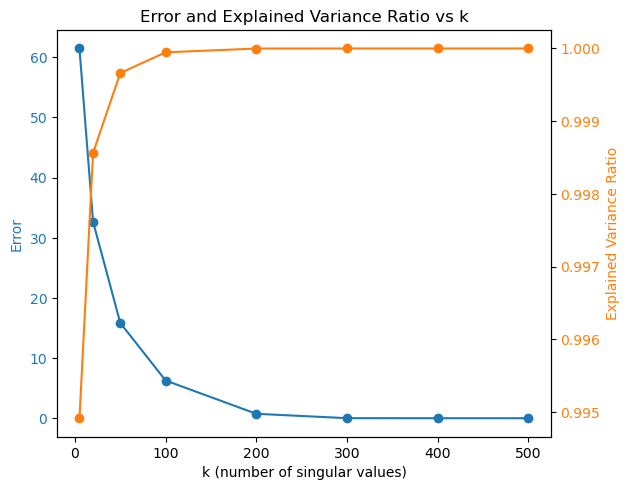

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float
import imageio

# Load image and convert to grayscale
def load_image(file_path):
    image = io.imread(file_path)
    if image.ndim == 3:
        image = color.rgb2gray(image)
    return img_as_float(image)

# Compute Singular Value Decomposition
def compute_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt

# Reconstruct image using top k singular values
def reconstruct_image(U, S, Vt, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

# Compute the least squares error
def compute_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed)

# Compute explained variance ratio
def explained_variance_ratio(S, k):
    return np.sum(S[:k]**2) / np.sum(S**2)

# Display the original and reconstructed images with metrics
def display_and_save_results(original, reconstructed, k, error, explained_variance):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display original image
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display reconstructed image
    axes[1].imshow(reconstructed, cmap='gray')
    axes[1].set_title(f'Reconstructed Image (k={k})')
    axes[1].axis('off')

    fig.suptitle(f'k={k}, Error={error:.2f}, Explained Variance={explained_variance:.2%}')
    plt.show()
    
    # Save the figure
    fig.savefig(f'MFDS_new_ASSIGNMENT_PY/result_k_{k}.jpg')
    plt.close(fig)
    
    # Save the reconstructed image as a jpg file
    imageio.imwrite(f'MFDS_new_ASSIGNMENT_PY/reconstructed_image_k_{k}.jpg', (reconstructed * 255).astype(np.uint8))

# Plot dual line plot for metrics comparison
def plot_metrics(singular_values, errors, explained_variances):
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('k (number of singular values)')
    ax1.set_ylabel('Error', color=color)
    ax1.plot(singular_values, errors, color=color, marker='o', linestyle='-', label='Error')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:orange'
    ax2.set_ylabel('Explained Variance Ratio', color=color)  # we already handled the x-label with ax1
    ax2.plot(singular_values, explained_variances, color=color, marker='o', linestyle='-', label='Explained Variance Ratio')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('Error and Explained Variance Ratio vs k')
    plt.show()

def main():
    # Load the image
    url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Example.jpg/800px-Example.jpg'
    image = load_image('AKM_FACE.jfif')

    # Compute SVD
    U, S, Vt = compute_svd(image)

    # Singular values to test
    singular_values = [5, 20, 50, 100, 200, 300, 400, 500]

    errors = []
    explained_variances = []

    for k in singular_values:
        # Reconstruct image using top k singular values
        reconstructed = reconstruct_image(U, S, Vt, k)
        
        # Compute error
        error = compute_error(image, reconstructed)
        errors.append(error)
        
        # Compute explained variance ratio
        explained_variance = explained_variance_ratio(S, k)
        explained_variances.append(explained_variance)
        
        # Display and save results
        display_and_save_results(image, reconstructed, k, error, explained_variance)

    # Plot metrics
    plot_metrics(singular_values, errors, explained_variances)

if __name__ == "__main__":
    main()


In [23]:
import os
os.getcwd()

'C:\\Users\\DELL'